# Project : Loan Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("E:\Data Science\\Loan_prediction.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [9]:
#Data - Preprocessing

In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
data.Gender=data.Gender.fillna("Male")

In [16]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
data.Married=data.Married.fillna("Yes")

In [19]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
data.Dependents=data.Dependents.fillna("0")

In [21]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
data.Self_Employed=data.Self_Employed.fillna("No")

In [23]:
data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [24]:
data.LoanAmount=data.LoanAmount.fillna(120.0)

In [25]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(360.0)

In [27]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
data.Credit_History=data.Credit_History.fillna(1.0)

In [31]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#split the data into inputs and outputs

In [33]:
x=data.iloc[:,1:12].values

In [34]:
y=data.iloc[:,12]

In [35]:
x

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [36]:
#train and test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [43]:
for i in range(0,5):
    x_train[:,i]=le.fit_transform(x_train[:,i])
x_train[:,10]=le.fit_transform(x_train[:,10])

In [44]:
le_y=LabelEncoder()

In [45]:
y_train=le_y.fit_transform(y_train)

In [46]:
le_xt=LabelEncoder()

In [47]:
for i in range(0,5):
    x_test[:,i]=le.fit_transform(x_test[:,i])
x_test[:,10]=le.fit_transform(x_test[:,10])

In [48]:
y_test=le_y.fit_transform(y_test)

In [49]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [50]:
#scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
x_train=sc.fit_transform(x_train)

In [54]:
x_test=sc.fit_transform(x_test)

In [55]:
#PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca=PCA(n_components=2)

In [58]:
x_train=pca.fit_transform(x_train)

In [59]:
x_train

array([[-3.01967823e-01, -6.30904566e-01],
       [-1.06346720e+00,  5.38431924e-01],
       [ 2.51088734e-01,  1.84151797e-01],
       [-1.59355032e+00,  2.16869786e+00],
       [-2.40857583e+00,  1.46469167e+00],
       [-1.25463562e+00, -1.17111648e-01],
       [-2.25197158e+00,  9.00106596e-01],
       [ 3.33823035e-01, -7.70795631e-01],
       [-1.04946816e+00,  8.79781039e-01],
       [ 7.36773460e-01, -2.66648690e+00],
       [ 4.88338542e-01, -1.59322116e+00],
       [-8.00295170e-01, -1.53778649e+00],
       [ 3.60633810e-01,  4.44454902e-01],
       [-2.72208836e+00,  4.99299299e-01],
       [ 1.34996012e+00, -4.44471525e-01],
       [ 5.65764608e-01, -9.75130714e-01],
       [-1.14573064e+00,  2.43259522e+00],
       [ 1.74208776e+00, -1.23300443e+00],
       [-1.45605501e+00,  1.89639408e+00],
       [-1.32633463e-01, -2.41626153e-01],
       [-1.69185550e+00,  2.34072739e+00],
       [-1.56737163e+00, -3.83131903e-01],
       [-2.02666287e+00,  9.68033456e-01],
       [-2.

In [60]:
x_test=pca.fit_transform(x_test)

In [63]:
x_test

array([[-5.99564804e-01,  1.46571409e+00],
       [-1.93607415e+00,  1.18821616e+00],
       [ 1.43987326e+00,  7.70110820e-01],
       [ 5.02691269e-02, -5.17043796e-01],
       [ 8.08581681e-01, -1.05637590e+00],
       [ 8.41175943e-02, -1.62456730e+00],
       [ 2.47159684e+00, -1.06464313e+00],
       [ 1.80024542e+00,  3.25626442e+00],
       [-9.48768551e-01,  3.23167979e-01],
       [-5.57972639e-04, -4.89280774e-01],
       [-2.22118383e+00,  8.88312821e-01],
       [ 3.34035252e-01, -8.51450641e-02],
       [-5.87162547e-01,  2.56377832e+00],
       [ 1.81844503e+00, -1.80099027e-01],
       [ 1.04435913e+00,  9.47213228e-01],
       [ 2.24867995e-01, -9.56283342e-01],
       [-1.38581908e-01,  4.77538259e-01],
       [-9.52934785e-01, -2.07774480e-01],
       [-2.29121681e+00,  1.27727340e+00],
       [-3.86687145e-01, -1.79500240e+00],
       [-1.76587762e+00, -9.61824405e-01],
       [ 1.17719248e-01, -3.24476837e-01],
       [ 1.25433880e+00,  2.22574090e-01],
       [ 1.

In [64]:
#classification

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lrclf=LogisticRegression(max_iter=20,random_state=0)

In [67]:
lrclf.fit(x_train,y_train)

LogisticRegression(max_iter=20, random_state=0)

In [68]:
y_pred=lrclf.predict(x_test)

In [69]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
print("accuracy",accuracy_score(y_pred,y_test))

accuracy 0.7207792207792207


In [73]:
print("confusion",confusion_matrix(y_pred,y_test))

confusion [[  0   0]
 [ 43 111]]


In [75]:
#visualization

In [77]:
x_test[:,0]

array([-5.99564804e-01, -1.93607415e+00,  1.43987326e+00,  5.02691269e-02,
        8.08581681e-01,  8.41175943e-02,  2.47159684e+00,  1.80024542e+00,
       -9.48768551e-01, -5.57972639e-04, -2.22118383e+00,  3.34035252e-01,
       -5.87162547e-01,  1.81844503e+00,  1.04435913e+00,  2.24867995e-01,
       -1.38581908e-01, -9.52934785e-01, -2.29121681e+00, -3.86687145e-01,
       -1.76587762e+00,  1.17719248e-01,  1.25433880e+00,  1.79656111e+00,
       -3.07287789e-01,  1.53790391e+00, -3.24142941e-01,  6.81936475e-01,
        1.04658307e+00, -2.38360365e+00,  1.23978456e+00, -1.12462856e+00,
        1.04818545e-01,  9.15594192e-01,  2.00018691e-01, -1.61159593e+00,
        2.78462507e-01, -9.05081890e-01,  3.99417771e-01,  7.73301700e-01,
       -2.27513492e+00,  1.07753075e+00,  7.43789759e-01,  6.16646433e-01,
       -9.35566964e-01,  1.86464408e-01,  5.54176273e-01, -1.88863036e+00,
        7.64479238e-01, -4.95867430e-01,  9.94417761e-01,  2.04031701e-01,
       -1.98362845e-01, -

In [79]:
import matplotlib.pyplot as plt

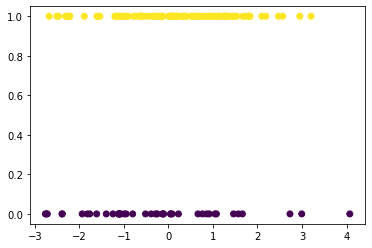

In [83]:
#observed data plot
plt.scatter(x_test[:,0],y_test,c=y_test)

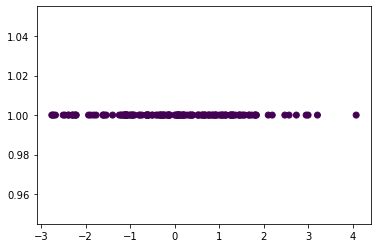

In [84]:
# predicted data plot
plt.scatter(x_test[:,0],y_pred,c=y_pred)